In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ysnnutil as yut

In [2]:
### Aluminum alloy AA6022-T4 r-values: r0=0.8; r45=0.37; r90=0.54
a1,a2,a3=yut.paramHill([0.8,0.37,0.54])

In [3]:
### Generate data 
vPoints=yut.genSpherePoints(10)
nPoints=vPoints.shape[0]
print('Number of data points = ',nPoints)
vPoints=vPoints/yut.ysHill(vPoints[:,0],vPoints[:,1],vPoints[:,2],a1,a2,a3).reshape((nPoints,1))

Number of data points =  72


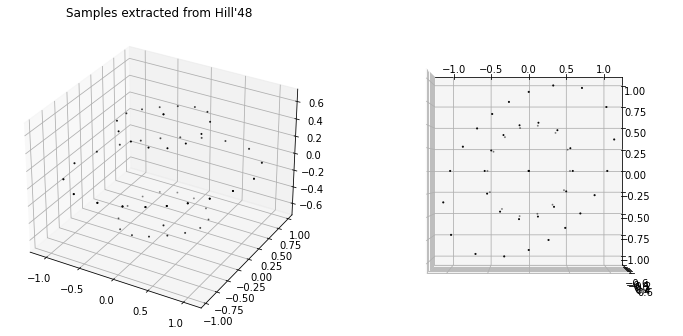

In [4]:
fg=plt.figure(figsize=(12,25))
axa=fg.add_subplot(1,2,1,projection='3d')
axa.scatter(vPoints[:,0],vPoints[:,1],vPoints[:,2],marker='o',color='k',s=1)
axa.set_title("Samples extracted from Hill'48")
axb=fg.add_subplot(1,2,2,projection='3d')
axb.scatter(vPoints[:,0],vPoints[:,1],vPoints[:,2],marker='o',color='k',s=1)
axb.azim=270;axb.elev=90
plt.show()

In [5]:
### Scramble the data and generate targets
np.random.seed(99)
pp=np.random.permutation(nPoints)
vPoints[:]=vPoints[pp[:]]
vTargets=np.ones((nPoints,1))

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import os,random
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gseed=99
np.random.seed(gseed)
random.seed(gseed)
os.environ['PYTHONHASHSEED']=str(gseed)

from keras import backend as K
if(0):
    config = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
    tf.set_random_seed(gseed)
    sess = tf.Session(graph=tf.get_default_graph(), config=config)
    K.set_session(sess)
if(1):
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.random.set_seed(gseed)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

2023-06-14 06:59:57.487479: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-14 06:59:57.487546: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-14 06:59:59.780783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-14 06:59:59.780847: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-14 06:59:59.780873: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (351b4228a409): /proc/driver/nvidia/version does not exist


In [7]:
def pwAct2(x):
    return x*x

opt=keras.optimizers.RMSprop(learning_rate=0.001)
nun=4
mmval=0.5
model=keras.Sequential([
layers.Dense(nun,activation=pwAct2,use_bias=False,
             kernel_initializer=keras.initializers.RandomUniform(minval=-mmval, maxval=mmval, seed=gseed),
             kernel_regularizer=keras.regularizers.L2(l2=1e-6)),
layers.Dense(1,use_bias=False,
             kernel_initializer=keras.initializers.Ones(),
             trainable=False)
])
model.compile(optimizer=opt,loss=keras.losses.MeanSquaredError(),metrics=["accuracy"])    
np.random.seed(gseed)
random.seed(gseed)
tf.random.set_seed(gseed)
history=model.fit(
vPoints,
vTargets,
epochs=750,
#batch_size=16,
batch_size=nPoints,
validation_data=()
)

Epoch 1/750
1/1 [==============================] - 0s 469ms/step - loss: 0.7800 - accuracy: 0.0000e+00
Epoch 2/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7747 - accuracy: 0.0000e+00
Epoch 3/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7708 - accuracy: 0.0000e+00
Epoch 4/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7674 - accuracy: 0.0000e+00
Epoch 5/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7644 - accuracy: 0.0000e+00
Epoch 6/750
1/1 [==============================] - 0s 5ms/step - loss: 0.7616 - accuracy: 0.0000e+00
Epoch 7/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7590 - accuracy: 0.0000e+00
Epoch 8/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.0000e+00
Epoch 9/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7540 - accuracy: 0.0000e+00
Epoch 10/750
1/1 [==============================] - 0s 4ms/step - loss: 0.7516 - accuracy

i =  0  sxy =  0.0
i =  1  sxy =  0.12913266227921802
i =  2  sxy =  0.19369899341882704
i =  3  sxy =  0.25826532455843604
i =  4  sxy =  0.32283165569804506
i =  5  sxy =  0.3873979868376541
i =  6  sxy =  0.45196431797726305
i =  7  sxy =  0.5165306491168721
i =  8  sxy =  0.5810969802564812
i =  9  sxy =  0.6295217286111878
i =  10  sxy =  0.6392066782821292
i =  11  sxy =  0.6443719847732979


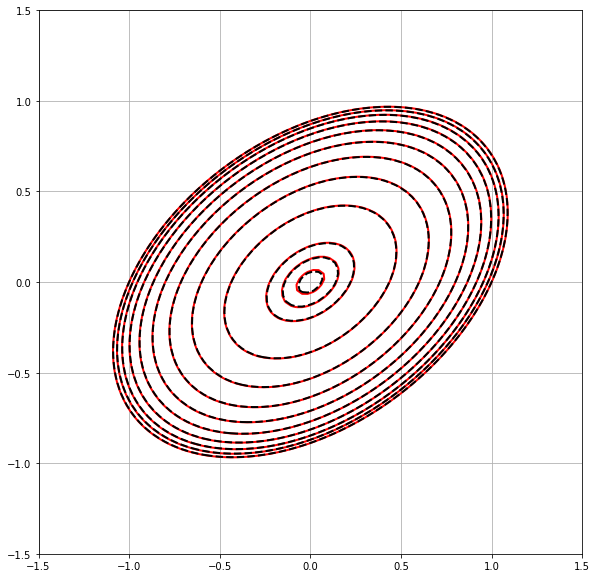

In [8]:
npt=100
vsx=np.linspace(-1.5,1.5,npt)
vsy=np.linspace(-1.5,1.5,npt)
maxSXY=1.0/np.sqrt(a3)
#vsxy=[0.0]
vsxy=maxSXY*np.array([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.975,0.99,0.998])
X,Y=np.meshgrid(vsx,vsy)
X,Y=X.reshape((npt*npt,1)),Y.reshape((npt*npt,1))
vp=np.zeros((npt*npt,3))
vp[:,0]=X[:,0];vp[:,1]=Y[:,0]
fg2=plt.figure(figsize=(10,10))
ax2=fg2.add_subplot()
for ii,sxy in enumerate(vsxy):
    vp[:,2]=sxy
    vz=model(vp)
    vzHill=yut.ysHill(vp[:,0],vp[:,1],vp[:,2],a1,a2,a3)
    print('i = ',ii, ' sxy = ',sxy)
    ax2.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linewidths=2,colors=['r'])
    ax2.contour(vsx,vsy,vzHill.reshape((npt,npt)),levels=[1.0],linewidths=2,linestyles='--',colors=['k'])
    #vz2=vTerms[0]**(1.0/degree);print(np.max(vz-vz2),np.min(vz-vz2))
    #ax.contour(vsx,vsy,vz2,levels=[1.0],linewidths=1,colors=['r'])
ax2.grid()
ax2.set_aspect('equal')
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 12
Non-trainable params: 4
_________________________________________________________________


In [10]:
vw=model.get_weights()
#dir(vw)
print('number of layers: ',len(vw))
print('first layer weight matrix: ',vw[0].shape)
print('second layer weight matrix: ',vw[1].shape)

number of layers:  2
first layer weight matrix:  (3, 4)
second layer weight matrix:  (4, 1)


In [11]:
model.save_weights('./nb02_fitHill', overwrite=True, save_format='tf', options=None)